Enter path to the folder:  C:\Users\MU036985\OneDrive\Desktop\StockAnalysis\ARMADA


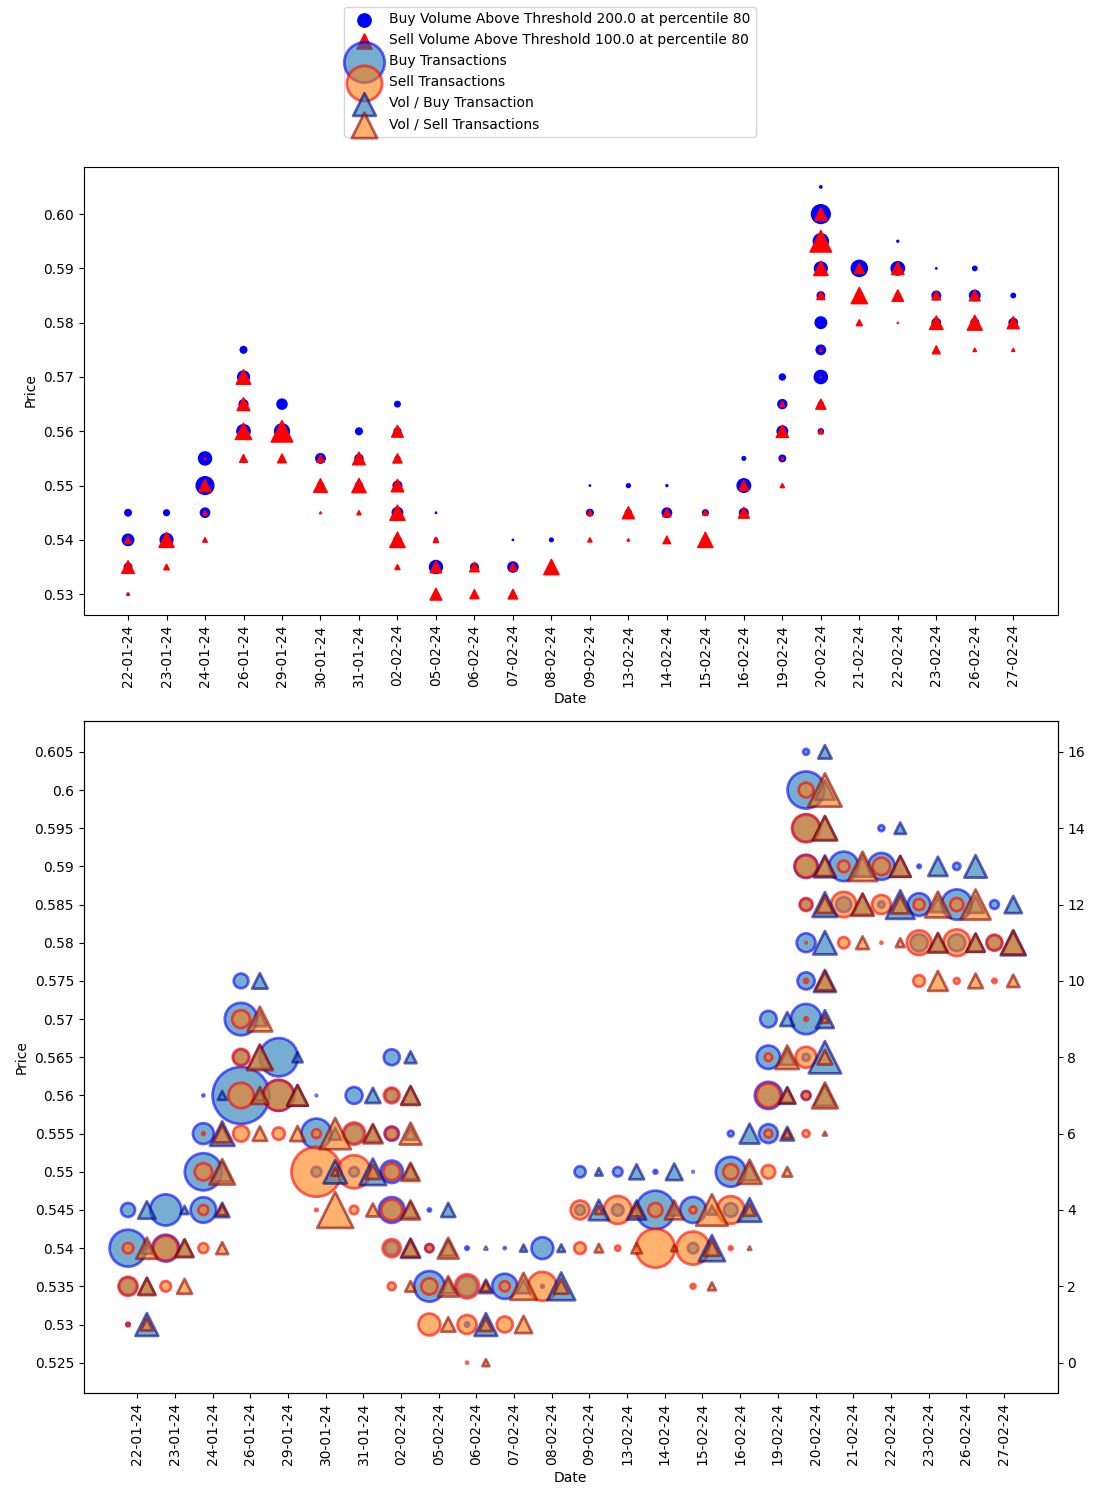

In [3]:
#!/usr/bin/env python
%matplotlib ipympl
from collections import OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import csv
import os

if __name__ == '__main__':
    #path = r"C:\Users\MU036985\OneDrive\Desktop\StockAnalysis\LeForm"
    path = input("Enter path to the folder: ")
    os.chdir(path)    
    percentile = 80    
    buyDatePriceDictionary= {}
    sellDatePriceDictionary={}

    for file in os.listdir():        
        with open(r"{}\{}".format(path, file), "r", encoding='utf-8') as csv_file:
            rows = csv.DictReader(csv_file, delimiter=",")
            # Construct a list to determine percentile value
            buyList = []
            sellList = []
            for row in rows:
                if(row["Type"] == 'B'):
                    buyList.append(float(row["Vol"]))
                elif(row["Type"] == 'S'):
                    sellList.append(float(row["Vol"]))
    buyPercentileValue = np.percentile(buyList, percentile)
    sellPercentileValue = np.percentile(sellList, percentile)

    buyDataDictionary= {}
    buyDataVolumeDictionary = {}
    sellDataDictionary={}
    sellDataVolumeDictionary = {}
    openDataDictionary={}
    openDataVolumeDictionary = {}
    buyUniquePriceGlobalSet = set()
    sellUniquePriceGlobalSet = set()
    openUniquePriceGlobalSet = set()
    
    for file in os.listdir():        
        dateString = file.removesuffix(".csv")
        dateObject = datetime.strptime(dateString, '%d-%m-%Y').date()
        with open(r"{}\{}".format(path, file), "r", encoding='utf-8') as csv_file:
            rows = csv.DictReader(csv_file, delimiter=",") 
            buyAboveTresholdPrice = []
            sellAboveTresholdPrice = []

            buyPriceCountDictionary = {}
            buyPriceVolumeDictionary = {}
            sellPriceCountDictionary = {}
            sellPriceVolumeDictionary = {}
            openPriceCountDictionary = {}
            openPriceVolumeDictionary = {}
            buyUniquePriceSet = set()
            sellUniquePriceSet = set()
            openUniquePriceSet = set()
            
            for row in rows:  
                if(row["Type"] == 'B'):
                    if(float(row["Vol"]) >= buyPercentileValue):
                        buyAboveTresholdPrice.append(float(row["Price"]))
                        
                    if(buyUniquePriceSet.isdisjoint({float(row["Price"])})):
                        buyUniquePriceSet.add(float(row["Price"]))
                        buyPriceCountDictionary[float(row["Price"])] = 1
                        buyPriceVolumeDictionary[float(row["Price"])] = 0
                    else:
                        buyPriceCountDictionary[float(row["Price"])] = buyPriceCountDictionary[float(row["Price"])] + 1
                        buyPriceVolumeDictionary[float(row["Price"])] = buyPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                elif (row["Type"] == 'S'):
                    if(float(row["Vol"]) >= sellPercentileValue):
                        sellAboveTresholdPrice.append(float(row["Price"]))
                        
                    if(sellUniquePriceSet.isdisjoint({float(row["Price"])})):
                        sellUniquePriceSet.add(float(row["Price"]))
                        sellPriceCountDictionary[float(row["Price"])] = 1
                        sellPriceVolumeDictionary[float(row["Price"])] = 0
                    else:
                        sellPriceCountDictionary[float(row["Price"])] = sellPriceCountDictionary[float(row["Price"])] + 1
                        sellPriceVolumeDictionary[float(row["Price"])] = sellPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                elif(row["Type"] == 'O'):
                    if(openUniquePriceSet.isdisjoint({float(row["Price"])})):
                        openUniquePriceSet.add(float(row["Price"]))
                        openPriceCountDictionary[float(row["Price"])] = 1
                        openPriceVolumeDictionary[float(row["Price"])] = 0
                    else:
                        openPriceCountDictionary[float(row["Price"])] = openPriceCountDictionary[float(row["Price"])] + 1
                        openPriceVolumeDictionary[float(row["Price"])] = openPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                        
                    
            buyDatePriceDictionary[dateObject] = buyAboveTresholdPrice
            sellDatePriceDictionary[dateObject] = sellAboveTresholdPrice

            buyDataDictionary[dateObject] = buyPriceCountDictionary
            sellDataDictionary[dateObject] = sellPriceCountDictionary
            openDataDictionary[dateObject] = openPriceCountDictionary
            buyDataVolumeDictionary[dateObject] = buyPriceVolumeDictionary
            sellDataVolumeDictionary[dateObject] = sellPriceVolumeDictionary
            openDataVolumeDictionary[dateObject] = openPriceVolumeDictionary
            buyUniquePriceGlobalSet.update(buyUniquePriceSet)
            sellUniquePriceGlobalSet.update(sellUniquePriceSet)
            openUniquePriceGlobalSet.update(openUniquePriceSet)
            #print(buyAboveTresholdPrice)
            #print(sellAboveTresholdPrice)
            
    fig = plt.figure()
    fig.set_figwidth(11)
    fig.set_figheight(15)
    spec = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[0.2, 2, 3])
    ax1 = fig.add_subplot(spec[1])
    
    datePosPercentileBuy = []
    datePosPercentileSell = []
    pricePosPercentileBuy = []
    pricePosPercentileSell = []
    bubblePosPercentileBuy = []
    bubblePosPercentileSell = []
    
    allDate = set()
    allDate.update(buyDatePriceDictionary.keys())
    allDate.update(sellDatePriceDictionary.keys())
    dateNumberMaping = {}
    for x, y in [(x, y) for x, y in zip(sorted(allDate), np.arange(len(allDate)))]:
        dateNumberMaping [x] = y
  
    
    for bDate in buyDatePriceDictionary.keys():        
        for bPriceSet in set(buyDatePriceDictionary[bDate]):
            datePosPercentileBuy.append(dateNumberMaping[bDate])
            pricePosPercentileBuy.append(bPriceSet)
            bubblePosPercentileBuy.append(buyDatePriceDictionary[bDate].count(bPriceSet))
            

    for sDate in sellDatePriceDictionary.keys():
        for sPriceSet in set(sellDatePriceDictionary[sDate]):
            datePosPercentileSell.append(dateNumberMaping[sDate])
            pricePosPercentileSell.append(sPriceSet)
            bubblePosPercentileSell.append(sellDatePriceDictionary[sDate].count(sPriceSet))
            
    #plotting
    ax1.scatter(datePosPercentileBuy, pricePosPercentileBuy, s=bubblePosPercentileBuy, c='blue' , label='Buy Volume Above Threshold {} at percentile {}'.format(buyPercentileValue, percentile))
    ax1.scatter(datePosPercentileSell, pricePosPercentileSell, s=bubblePosPercentileSell, c='red', marker = '^', label='Sell Volume Above Threshold {} at percentile {}'.format(sellPercentileValue, percentile))
    ax1.set_xticks(list(dateNumberMaping.values()), [x.strftime('%d-%m-%y') for x  in dateNumberMaping.keys()], ha='center', rotation = 'vertical')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price")
    #fig.legend(loc='upper center')
    #plt.show()
    
    ax2 = fig.add_subplot(spec[2])
    datePosBuy = []
    datePosSell = []
    datePosOpen = []
    pricePosBuy = []
    pricePosSell = []
    pricePosOpen = []
    countPosBuy = []
    countPosSell = []
    countPosOpen = []
    volPerTranPosBuy = []
    volPerTranPosSell = []
    volPerTranPosOpen = []
    
    allDate = set()
    allDate.update(buyDataDictionary.keys())
    allDate.update(sellDataDictionary.keys())
    allDate.update(openDataDictionary.keys())
    dateNumberMaping = {}
    for x, y in [(x, y) for x, y in zip(sorted(allDate), [2  + (x * 2) for x in range(0, len(allDate))])]:
        dateNumberMaping [x] = y

    allPrice = set()
    allPrice.update(buyUniquePriceGlobalSet)
    allPrice.update(sellUniquePriceGlobalSet)
    allPrice.update(openUniquePriceGlobalSet)
    priceNumberMaping = {}
    for x, y in [(x, y) for x, y in zip(sorted(allPrice), np.arange(len(allPrice)))]:
        priceNumberMaping [x] = y

    for aDate in buyDataDictionary.keys():        
        for aPrice in buyDataDictionary[aDate]:
            datePosBuy.append(dateNumberMaping[aDate])
            pricePosBuy.append(priceNumberMaping[aPrice])
            countPosBuy.append(buyDataDictionary[aDate][aPrice])   
            volPerTranPosBuy.append(float(buyDataVolumeDictionary[aDate][aPrice] / buyDataDictionary[aDate][aPrice]))

        
    for sDate in sellDataDictionary.keys():
        for sPrice in sellDataDictionary[sDate]:
            datePosSell.append(dateNumberMaping[sDate])
            pricePosSell.append(priceNumberMaping[sPrice])
            countPosSell.append(sellDataDictionary[sDate][sPrice])
            volPerTranPosSell.append(float(sellDataVolumeDictionary[sDate][sPrice] / sellDataDictionary[sDate][sPrice]))

    for oDate in openDataDictionary.keys():
            for oPrice in openDataDictionary[oDate]:
                datePosOpen.append(dateNumberMaping[oDate])
                pricePosOpen.append(priceNumberMaping[oPrice])
                countPosOpen.append(openDataDictionary[oDate][oPrice])  
                volPerTranPosOpen.append(float(openDataVolumeDictionary[oDate][oPrice] / openDataDictionary[oDate][oPrice]))    
            
    ax2.scatter([x - 0.5 for x in datePosBuy], pricePosBuy, s=countPosBuy, edgecolors='blue', alpha=0.6, linewidths=2, label='Buy Transactions') # Buy
    ax2.scatter([x - 0.5 for x in datePosSell], pricePosSell, s=countPosSell,  edgecolors='red', alpha=0.6, linewidths=2, label='Sell Transactions') # Sell
    #ax1.scatter([x - 0.5 for x in datePosOpen], pricePosOpen, s=countPosOpen, alpha=0.6, edgecolors='darkyellow', linewidths=2, label='Open Transactions') # Open
    
    ax2.set_xticks(list(dateNumberMaping.values()), [x.strftime('%d-%m-%y') for x  in dateNumberMaping.keys()], ha='center', rotation = 'vertical')
    ax2.set_yticks(list(priceNumberMaping.values()), priceNumberMaping.keys(), ha='right')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Price")

    ax3 = ax2.twinx()
    ax3.scatter([x + 0.5 for x in datePosBuy], pricePosBuy, s=volPerTranPosBuy, edgecolors='darkblue', alpha=0.6, linewidths=2, label='Vol / Buy Transaction', marker = '^') # Buy
    ax3.scatter([x + 0.5 for x in datePosSell], pricePosSell, s=volPerTranPosSell,  edgecolors='darkred', alpha=0.6, linewidths=2, label='Vol / Sell Transactions', marker = '^') # Sell
    #ax2.scatter([x + 0.5 for x in datePosOpen], pricePosOpen, s=volPerTranPosOpen, alpha=0.6, edgecolors='darkyellow', linewidths=2, label='Vol / Open Transactions', marker = '^') # Open
    fig.tight_layout()
    fig.legend(loc="upper center")
    plt.show()
    
    
    
        






 





